# 图像特效-素描效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [11]:
src = cv2.imread('../datas/f4.jpg')
gray = cv2.imread('../datas/f4.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [22]:
def sketch(src):
    gray = src
    gray = gray.astype(np.float32)
    dst = np.zeros_like(gray)
    if len(src.shape) > 2:
        gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
    img_inv = 255 - gray
    gauss = cv2.GaussianBlur(gray,(15,15),0).astype(np.float32)
    dst = img_inv + (img_inv * gauss) / (255.0 - gauss + 1.0e-5)
    dst[dst < 0] = 0
    dst[dst > 255] = 255
#     dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

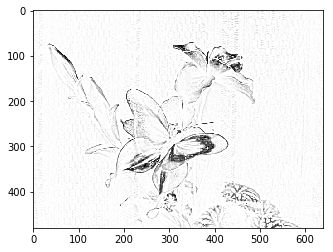

In [23]:
dst = sketch(rgb)
plt.imshow(dst,'gray')